In [0]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display, HTML

# IE550-A

### EFC 1 - Data de Entrega: 20/03

### Questão 1. Convolução

-------------------------
**(a)** Determine o comprimento P da sequência $y[n]$ gerada na saída do sistema em função de K e D.
Como tanto a entrada $x[n]$ quanto a resposta ao impulso $h[n]$ são sequencias de comprimento finito, ́e possıvel determinar a sa ́ıda $y[n]$ explorando uma representação vetorial. Seja $y = [y[0], y[1] ... y[P−1]]$ T o vetor que descreve a saída $y[n]$. Então, podemos escrever que: $y = Hx$, (2)

onde $H ∈ R ^ {PxK}$ é a matriz de convolução do sistema e x denota o vetor associado ao sinal de entrada.


**Resposta:**

Tendo que a convolução descreve um operador linear entre duas funções que resulta em uma terceira com tamanho total a somatória de ambas, o tamanho do vetor de saída $y[n]$ é igual a $K+D-1$.


-------------------------
**(b)** Mostre que este procedimento para o calculo da convolução esta correto, identificando quem e a matriz *H* e o vetor *x*.

**Resposta:**

Se *K*=5 e *D*=3, portanto:

$P = K + D - 1$

$P = 5 + 3 - 1 \Rightarrow P = 7$


Exemplo de convolução *K*=2 e *D*=3:

$y[0] = x[0] . h[0]$

$y[1] = x[0] . h[1] + x[1] . h[0]$

$y[2] = x[0] . h[2] + x[1] . h[1] + x[2] . h[0]$

$y[3] = x[1] . h[2] + x[2] . h[1] + x[3] . h[0]$

...


Para criar um programa que calcule a convolução, precisamos gerar uma matriz com a multiplicação entre cada elemento do vetor $x[n]$ com o de $h[n]$. Em seguinda, devemos realizar a somatória da diagonal dessa matriz, a qual tera como saída o vetor $y[n]$.

In [156]:
def convolve1D(x, h):
  """Função para calcular a convolução entre dois vetores."""
  K, D = len(x), len(h)
  S = K + D - 1  
  
  # Montamos uma matriz com o calculo entre cada uma das colunas de K e D
  matrix = np.zeros((K, D))
  for i, k in enumerate(x):
    for j, d in enumerate(h):
      matrix[i, j] = k * d
  # Precisamos inverter a matriz no eixo x, para usar a função np.diagonal abaixo
  matrix = np.flip(np.matrix(matrix), axis=1)
  
  # Neste momento, vamos calcular todos os valores das diagonais...
  # Vamos somar todos os valores para retornar o vetor da convolução
  y = np.array([np.sum(np.diagonal(matrix, axis1=1, axis2=0, offset=m-(D-1))) for m in range(S)])
  return y.astype(int)

# Definimos um vetor randômico como x
x = np.random.randint(0, high=10, size=7)
# Definimos um vetor randômico como h
h = np.flip(np.random.randint(0, high=10, size=5), axis=0)
# numpy convolve
np_conv = np.convolve(x, h)
# my convolve
y = convolve1D(x, h)

print('Resultados:')
print('-' * 20)
print('Tam. x:       ', len(x))
print('Tam. h:       ', len(h))
print('Tam. (x * h): ', len(np_conv))
print('convolve == np.convolve: ', 'Verdadeiro' if np.array_equal(y, np_conv) else 'Falso')

print('-' * 20)
print('Vetores:')
print('x: ', x)
print('h: ', h)
print('y: ', y)
print('np:', np_conv)

Resultados:
--------------------
Tam. x:        7
Tam. h:        5
Tam. (x * h):  11
convolve == np.convolve:  Verdadeiro
--------------------
Vetores:
x:  [1 3 5 2 9 9 8]
h:  [5 1 5 8 0]
y:  [  5  16  33  38  96 104 110 125 112  64   0]
np: [  5  16  33  38  96 104 110 125 112  64   0]


### Questão 2. Resposta em Frequência

-------------------------
Sabendo que é possível controlar o sinal $x[n]$ colocado na entrada do sistema LIT, assim como observar a saida $y[n]$ gerada, proponha uma estratégia que realize a determinação da resposta em frequência $H(e^{jw})$ do sistema, na faixa de frequências $w \in [0, \pi]$ rad. Explique claramente quais conceitos estão sendo explorados na solução proposta, assim como todos os passos envolvidos no processo.

**Resposta:**

Sabendo que:

$Y(e^{jw}) = H(e^{jw}) \times X(e^{jw})$

Dessa maneira, podemos calcular os valores de $H(e^{jw})$ utilizando a operação contrária a multiplicação das transformadas de Fourier de cada sinal:

$H(e^{jw}) = \frac {Y(e^{jw})}{X(e^{jw})}$


In [0]:
# SISTEMA DESCONHECIDO... IGNORAR O CONTEÚDO
def sistema_desconhecido(x):
    N = 400
    n = np.arange(N)
    hn = (1/2) * np.exp(-0.3 * abs(n - 100)) * np.cos(math.pi/10 * n)
    y = np.convolve(hn, x)
    return y

-------------------------
A função sistema_desconhecido fornecido contém a implementação de um sistema LIT cujo comportamento não é conhecido. Ele recebe uma sequencia $x[n]$ de entrada e devolve a saída $y[n]$ correspondente.  As únicas informações que temos sobre o sistema é que ele possui uma resposta ao impulso $h[n]$ com duração finita, e que $H(e^{jw}), w$ é real. Neste cenário, sua missão é levantar a resposta em frequência do sistema utilizando a estratégia proposta.

**(c)** Uma vez que vamos trabalhar em um computador digital, algumas limitações surgem com relação ao tipo de sequência que pode ser gerada (e.g., somente de comprimento finito). Tendo em mente questões como esta, discuta como a estratégia planejada para obter a resposta em frequência pode ser adaptada, ou, em outras palavras, de que modo os valores de $||H(e^{jw})||$ podem ser obtidos com segurançaa considerando a faixa de frequências sugerida. Mostre os passos do procedimento (i.e., quem é a entrada? Qual foi a saída observada? Como o valor de $||H(e^{jw})||$ foi obtido?) considerando duas frequências específicas.

**(d)** Prepare um programa que faça a captura dos valores de $||H(e^{jw})||$, na faixa de 0 rad a $\pi$ rad, de forma automática.

**(e)** Plote o módulo da resposta em frequência obtida em função de $w$. Por fim, comente de maneira sucinta como o sistema em questão se comporta no domínio da frequência.

**Resposta:**

Vamos colocar como sinal de entrada acordes musicais misturados (através da convolução dos mesmos), para testar a resolução do filtro.

Usando a resposta da questão acima, iremos converter os sinais para sua representação em frequência, usando a transformada de Fourier e depois retornaremos para a representação em tempo usando a transformada inversa.

Farei a divisão do sinal de entrada pelo de saída para encontrarmos o valor do sistema desconhecido e verificaremos sua função matemática.

Primeiro, vamos definir algumas notas musicais e as frequências que elas estão localizadas.

In [158]:
df = pd.DataFrame(
    [['C',130.82], ['C#',138.59], ['D',146.83], ['D#',155.56], ['E',164.81], ['F',174.61], ['F#',185], ['G',196], ['G#',207.65], ['A',220], ['A#',233.08], ['B',246.94], ['C',261.63], ['C#',277.18], ['D',293.66], ['D#',311.13], ['E',329.63], ['F',349.23], ['F#',369.99], ['G',392], ['G#',415.3], ['A',440], ['A#',466.16], ['B',493.88], ['C',523.25], ['C#',554.37], ['D',587.33], ['D#',622.25], ['E',659.26], ['F',698.46], ['F#',739.99], ['G',783.99], ['G#',830.61], ['A',880], ['A#',932.33], ['B',987.77], ['C',1046.5], ['C#',1108.73], ['D',1174.66], ['D#',1244.51], ['E',1318.51], ['F',1396.91], ['F#',1479.98], ['G',1567.98], ['G#',1661.22], ['A',1760], ['A#',1864.66], ['B',1975.53], ['C',2093]],
    columns=['Note', 'Frequency']
)
display(df.head(5))

,Note,Frequency
0,C,130.82
1,C#,138.59
2,D,146.83
3,D#,155.56
4,E,164.81


Criamos duas funções abaixo, para gerar os acordes e os respectivos sinais gerados a partir da convolução deles. Criamos dois sinais diferentes para constatar que o retorno do sistema desconhecido será o mesmo.

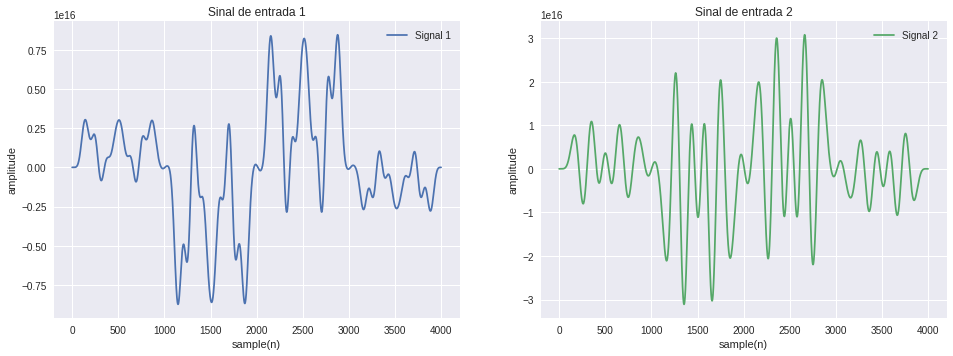

In [159]:
def gen_coords(f=440, peak=4096, Fs=44100, duration=1, partial=False):
  """Generate a sine wave of a coord... default is A."""
  # Fs = 48000     # sampling rate, Hz, must be integer
  # f = 440        # sine frequency, Hz, may be float
  # duration = 5   # in seconds, may be float
  n = np.arange(Fs * duration)
  signal = (peak * np.sin(2 * np.pi * f * n / Fs)).astype('int16')
  if partial:
    return signal[:1000]
  return signal

def create_signal(freqs, partial=False):
  """Mix various coords to create a new signal to process."""
  coords = [gen_coords(f=f, partial=partial) for f in freqs]
  signal = np.ones([len(coords[0])])
  for c in coords:
    signal = np.convolve(signal, c)
  return signal

signal1 = create_signal([440, 130.82, 349.23], True)
signal2 = create_signal([df.iat[5, 1], df.iat[15, 1], df.iat[12, 1]], True)

plt.figure(1, figsize=(16, 12))

plt.subplot(221)
plt.plot(signal1, label='Signal 1')
plt.title('Sinal de entrada 1')
plt.xlabel('sample(n)')
plt.ylabel('amplitude')
plt.legend()

plt.subplot(222)
plt.plot(signal2, label='Signal 2', color='C1')
plt.title('Sinal de entrada 2')
plt.xlabel('sample(n)')
plt.ylabel('amplitude')
plt.legend()
plt.show()

Utilizando a função que exerce sobre o sinal de entrada uma operação, temos como resultado ambos os sinais de saída abaixo.

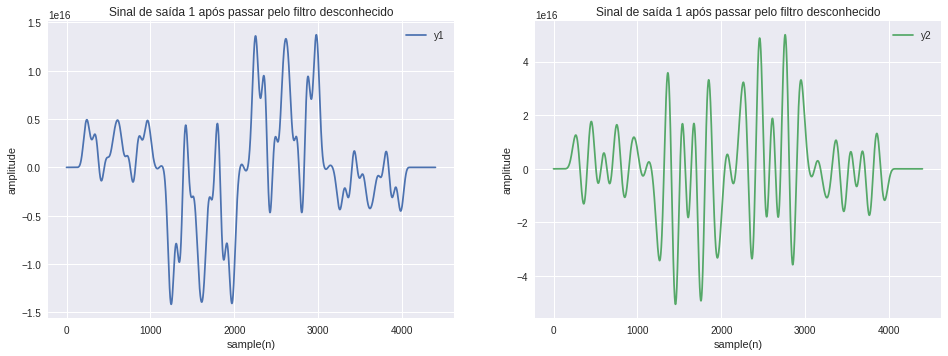

In [160]:
y1 = sistema_desconhecido(signal1)
y2 = sistema_desconhecido(signal2)

plt.figure(1, figsize=(16, 12))

plt.subplot(221)
plt.plot(y1, label='y1')
plt.title('Sinal de saída 1 após passar pelo filtro desconhecido')
plt.xlabel('sample(n)')
plt.ylabel('amplitude')
plt.legend()

plt.subplot(222)
plt.plot(y2, label='y2', color='C1')
plt.title('Sinal de saída 1 após passar pelo filtro desconhecido')
plt.xlabel('sample(n)')
plt.ylabel('amplitude')
plt.legend()

plt.show()

Podemo verificar em ambos os gráficos abaixo que ambos os sinais de saída sofreram uma mudança na amplitude e fase com relação aos sinais de entradas originais.

Em azul os sinais de entrada e em verde os sinais de saída.

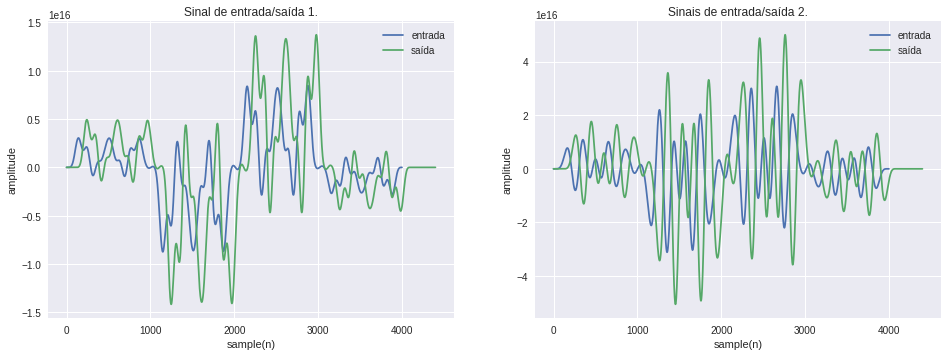

In [161]:
}plt.figure(1, figsize=(16, 12))

plt.subplot(221)
plt.plot(signal1, label='entrada')
plt.plot(y1, label='saída')
plt.title('Sinal de entrada/saída 1.')
plt.xlabel('sample(n)')
plt.ylabel('amplitude')
plt.grid(True)

plt.legend()
plt.subplot(222)
plt.plot(signal2, label='entrada')
plt.plot(y2, label='saída')
plt.title('Sinais de entrada/saída 2.')
plt.xlabel('sample(n)')
plt.ylabel('amplitude')
plt.legend()
plt.grid(True)

plt.show()

Vamos criar uma função que represente a equeção definida na resposta inicial desta questão:

$H(e^{jw}) = \frac {Y(e^{jw})}{X(e^{jw})}$

--------------------
Média de h1       : 0.0003673666970310305
Média de h2       : 0.0003673666970313395
Diferença h1 - h2 : -1.3580957647536807e-12
--------------------



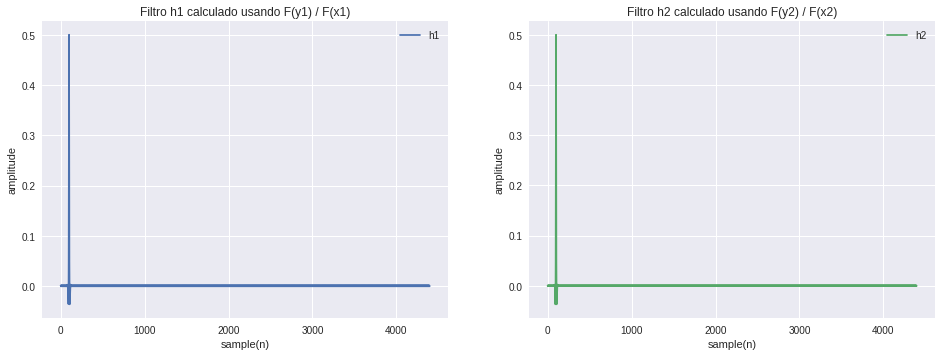

In [162]:
def descobre_sistema(y, x):
  xn = np.zeros(y.shape)
  xn[:len(x)] = x
  return (np.fft.ifft(np.fft.fft(y) / np.fft.fft(xn))).real

# Filtro do sinal1 == h1
h1 = descobre_sistema(y1, signal1)

# Filtro do sinal2 == h2
h2 = descobre_sistema(y2, signal2)

print('-' * 20)
print('Média de h1       :', np.mean(h1))
print('Média de h2       :', np.mean(h2))
print('Diferença h1 - h2 :', np.sum(h1 - h2))
print('-' * 20)
print()

plt.figure(1, figsize=(16, 12))
plt.subplot(221)
plt.plot(h1, label='h1')
plt.title('Filtro h1 calculado usando F(y1) / F(x1)')
plt.xlabel('sample(n)')
plt.ylabel('amplitude')
plt.legend()

plt.subplot(222)
plt.plot(h2, label='h2', color='C1')
plt.title('Filtro h2 calculado usando F(y2) / F(x2)')
plt.xlabel('sample(n)')
plt.ylabel('amplitude')
plt.legend()

plt.show()

Para confirmar se o sinal do sistema encontrado esta correto iremos restaurar o valor do sinal original realizando o cáluclo inverso.

$X(e^{jw}) = \frac {Y(e^{jw})}{H(e^{jw})}$

É possível notar que a alteração da fase do sinal original gera uma quantidade de amostras extras com valores zeros nos sinais de saída.

Verifica-se que a diferença entre os sinais de entrada original e saídas restaurados é pequeno.

--------------------
Média de sinal restaurado y / h : 12814689354.074614
Média de signal1                : 14093914034.950212
Igualdade signal 1 == xn1       : False
Diferença signal 1 - xn1        : -3043.544301308085
--------------------



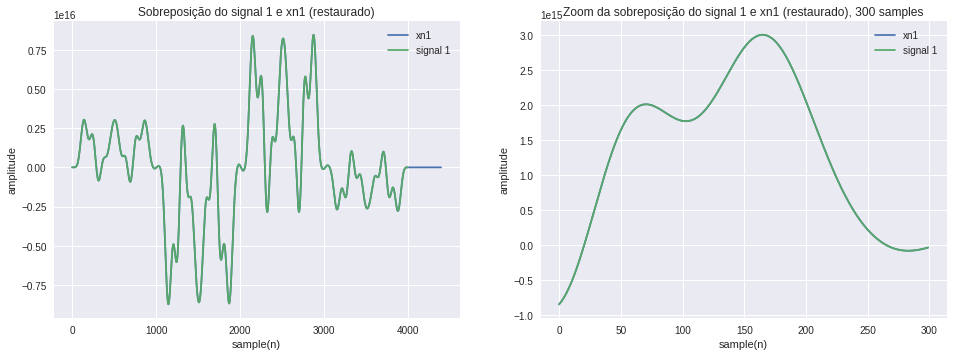

In [163]:
def restaurando_sinal_original(y, h):
  hn = np.zeros(y.shape)
  hn[:len(h)] = h
  return (np.fft.ifft(np.fft.fft(y) / np.fft.fft(hn))).real[:len(h)]

xn1 = restaurando_sinal_original(y1, h1)
  
print('-' * 20)
print('Média de sinal restaurado y / h :', np.mean(xn1))
print('Média de signal1                :', np.mean(signal1))
print('Igualdade signal 1 == xn1       :', np.array_equal(xn1, signal1))
print('Diferença signal 1 - xn1        :', np.sum(signal1 - xn1[:3997]))
print('-' * 20)
print()

plt.figure(1, figsize=(16, 12))
plt.subplot(221)
plt.plot(xn1, label='xn1')
plt.plot(signal1, label='signal 1')
plt.title('Sobreposição do signal 1 e xn1 (restaurado)')
plt.xlabel('sample(n)')
plt.ylabel('amplitude')
plt.legend()

plt.subplot(222)
plt.plot(xn1[700:1000], label='xn1')
plt.plot(signal1[700:1000], label='signal 1')
plt.title('Zoom da sobreposição do signal 1 e xn1 (restaurado), 300 samples')
plt.xlabel('sample(n)')
plt.ylabel('amplitude')
plt.legend()

plt.show()